<a href="https://colab.research.google.com/github/simonemallei/complex-systems-social-graph/blob/main/recommender_social_graph/content/notebook/Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning the repository used in the notebook:

In [1]:
!git clone https://github.com/simonemallei/complex-systems-social-graph.git

Cloning into 'complex-systems-social-graph'...
remote: Enumerating objects: 183, done.
remote: Counting objects: 100% (183/183), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 183 (delta 60), reused 103 (delta 31), pack-reused 0
Receiving objects: 100% (183/183), 1.00 MiB | 13.16 MiB/s, done.
Resolving deltas: 100% (60/60), done.


Printing the files' names in its "recommender_social_graph" directory:

In [2]:
!ls

complex-systems-social-graph  sample_data


In [3]:
%cd complex-systems-social-graph/recommender_social_graph/

/content/complex-systems-social-graph/recommender_social_graph


In [4]:
!ls

abeba_methods.py  content	     metrics.py		people
beba_methods.py   graph_creation.py  models_comparison
beba_tests	  __init__.py	     multi_dimensional


Importing mandatory methods for the notebook:

In [5]:
import networkx as nx
import random
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
from graph_creation import create_graph
from abeba_methods import apply_initial_feed, simulate_epoch_updated, compute_activation
from metrics import polarisation
from content.metrics import feed_entropy
from content.content_recommender import simulate_epoch_content_recommender

Creation and print of a graph:

Starting graph: 
  node label    opinion value
------------  ---------------
           0           -0.908
           1           -0.914
           2            0.742
           3            0.817
           4           -0.192
           5           -0.654
           6           -0.052
           7            0.571
           8            0.78
           9            0.335
          10            0.562
          11            0.86
          12            0.885
          13            0.013
          14            0.527
          15           -0.817
          16           -0.075
          17           -0.803
          18            0.768
          19            0.098
          20           -0.146
          21           -0.814
          22           -0.807
          23           -0.917
          24           -0.8
          25           -0.68
          26            0.691
          27           -0.93
          28           -0.547
          29            0.624
          30           -0.32


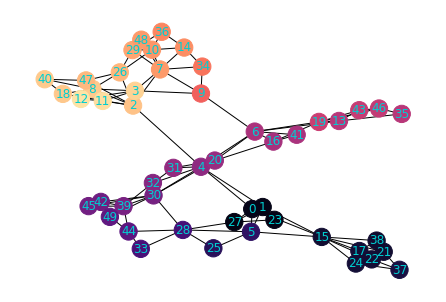

In [6]:
# create graph and update it with ABEBA model (with epsilon-error == 0.0)
G = create_graph(50, [1], avg_friend = 3, hp_alpha=5, hp_beta=0)
G = apply_initial_feed(G)
print("Starting graph: ")
colors = list(nx.get_node_attributes(G, 'opinion').values())
labels =  nx.get_node_attributes(G, 'opinion')
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

Simulating an epoch with ABEBA model (with no Recommender):

  node label    opinion value
------------  ---------------
           0           -0.868
           1           -0.909
           2            0.742
           3            0.855
           4           -0.211
           5           -0.654
           6           -0.052
           7            0.571
           8            0.78
           9            0.328
          10            0.562
          11            0.86
          12            0.885
          13            0.034
          14            0.528
          15           -0.817
          16           -0.063
          17           -0.841
          18            0.768
          19            0.097
          20           -0.146
          21           -0.829
          22           -0.807
          23           -0.899
          24           -0.8
          25           -0.68
          26            0.691
          27           -0.93
          28           -0.556
          29            0.624
          30           -0.32
          31     

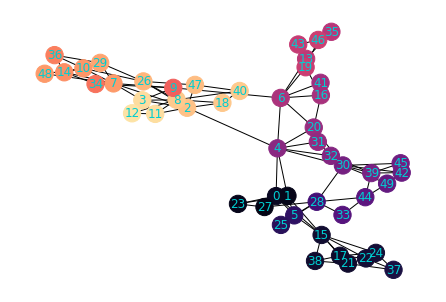

In [7]:
# Simulating an epoch and printing the opinion graph obtained
G = simulate_epoch_updated(G, 50, 50)
colors = list(nx.get_node_attributes(G, 'opinion').values())
labels =  nx.get_node_attributes(G, 'opinion')
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

Creation and print of a graph:

Starting graph: 
  node label    opinion value
------------  ---------------
           0           -0.826
           1            0.648
           2           -0.555
           3           -0.113
           4           -0.95
           5           -0.109
           6           -0.881
           7            0.062
           8           -0.754
           9            0.541
          10           -0.652
          11           -0.39
          12           -0.487
          13           -0.677
          14            0.194
          15           -0.669
          16           -0.735
          17            0.454
          18           -0.055
          19            0.762
          20           -0.068
          21            0.725
          22           -0.368
          23           -0.72
          24            0.957
          25           -0.182
          26           -0.07
          27            0.456
          28           -0.741
          29            0.543
          30            0.2

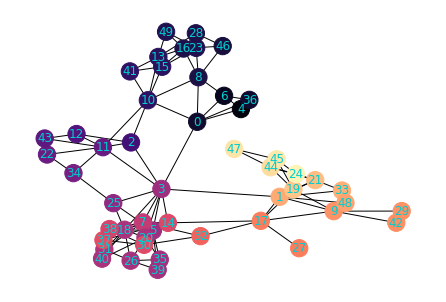

In [8]:
# create graph and update it with ABEBA model (with epsilon-error == 0.0)
G = create_graph(50, [1], avg_friend = 3, hp_alpha=5, hp_beta=0)
G = apply_initial_feed(G)
print("Starting graph: ")
colors = list(nx.get_node_attributes(G, 'opinion').values())
labels =  nx.get_node_attributes(G, 'opinion')
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

Simulating 100 updates of 2 graphs:
- Previous graph with no recommender
- Previous graph with random content recommender

Then showing the two graphs' opinions and their polarisation value.

Starting Nodes:
  node label    opinion value
------------  ---------------
           0           -0.826
           1            0.648
           2           -0.555
           3           -0.113
           4           -0.95
           5           -0.109
           6           -0.881
           7            0.062
           8           -0.754
           9            0.541
          10           -0.652
          11           -0.39
          12           -0.487
          13           -0.677
          14            0.194
          15           -0.669
          16           -0.735
          17            0.454
          18           -0.055
          19            0.762
          20           -0.068
          21            0.725
          22           -0.368
          23           -0.72
          24            0.957
          25           -0.182
          26           -0.07
          27            0.456
          28           -0.741
          29            0.543
          30            0.20

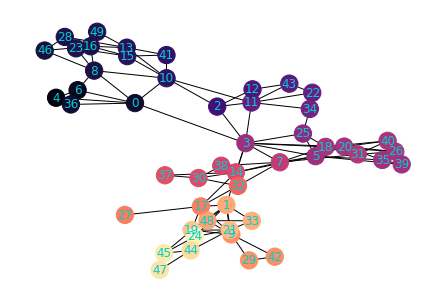

No Recommender Nodes:
  node label    opinion value
------------  ---------------
           0           -0.189
           1            0.185
           2           -0.144
           3           -0.088
           4           -0.369
           5           -0.108
           6           -0.38
           7           -0.038
           8           -0.45
           9            0.244
          10           -0.423
          11           -0.17
          12           -0.226
          13           -0.478
          14           -0.029
          15           -0.478
          16           -0.467
          17            0.148
          18           -0.071
          19            0.253
          20           -0.082
          21            0.255
          22           -0.22
          23           -0.467
          24            0.25
          25           -0.082
          26           -0.105
          27            0.104
          28           -0.475
          29            0.26
          30            

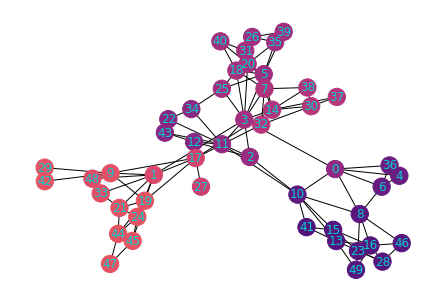

Random Recommender Nodes:
  node label    opinion value
------------  ---------------
           0           -0.039
           1            0.071
           2            0.012
           3           -0.238
           4            0.01
           5            0.363
           6            0.04
           7           -0.262
           8           -0.064
           9            0.174
          10           -0.184
          11            0.055
          12           -0.553
          13            0.015
          14           -0.2
          15            0.104
          16            0.037
          17            0.276
          18            0.015
          19           -0.072
          20            0.274
          21            0.163
          22           -0.042
          23            0.075
          24            0.096
          25           -0.085
          26           -0.134
          27            0.233
          28           -0.052
          29           -0.099
          30      

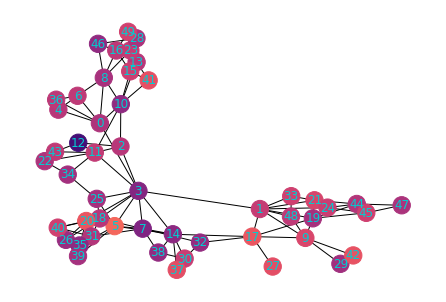

Normal Recommender Nodes:
  node label    opinion value
------------  ---------------
           0            0.019
           1           -0.009
           2            0.011
           3            0.029
           4           -0.003
           5            0.023
           6            0.021
           7            0.013
           8           -0.019
           9           -0
          10           -0.013
          11           -0.013
          12           -0.014
          13           -0.065
          14            0.032
          15            0.008
          16           -0.027
          17            0.006
          18            0.024
          19            0.043
          20            0.026
          21            0.003
          22            0.028
          23           -0.033
          24           -0.017
          25            0.014
          26            0.039
          27           -0.08
          28           -0
          29            0.001
          30           

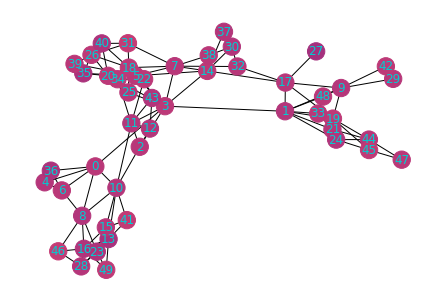

Similar Recommender Nodes:
  node label    opinion value
------------  ---------------
           0           -0.525
           1            0.603
           2           -0.42
           3           -0.363
           4           -0.512
           5           -0.308
           6           -0.528
           7           -0.3
           8           -0.53
           9            0.603
          10           -0.491
          11           -0.405
          12           -0.378
          13           -0.539
          14           -0.305
          15           -0.532
          16           -0.558
          17            0.603
          18           -0.288
          19            0.603
          20           -0.325
          21            0.603
          22           -0.404
          23           -0.564
          24            0.603
          25           -0.331
          26           -0.287
          27            0.603
          28           -0.589
          29            0.603
          30     

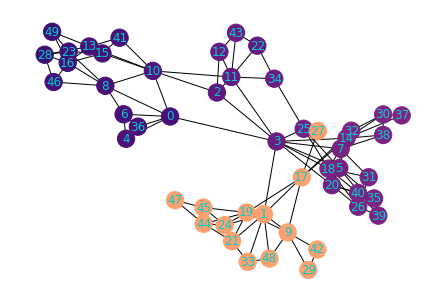

Unsimilar Recommender Nodes:
  node label    opinion value
------------  ---------------
           0           -0.258
           1            0.347
           2           -0.235
           3            0.061
           4           -0.668
           5           -0.109
           6           -0.513
           7            0.062
           8           -0.529
           9            0.541
          10           -0.419
          11           -0.388
          12           -0.487
          13           -0.677
          14            0.194
          15           -0.669
          16           -0.735
          17            0.454
          18           -0.055
          19            0.762
          20           -0.068
          21            0.725
          22           -0.368
          23           -0.72
          24            0.707
          25           -0.182
          26           -0.07
          27            0.456
          28           -0.741
          29            0.543
          30 

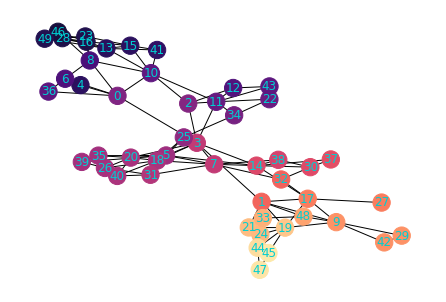

Polarisation (starting): 16.268089660228608
Polarisation (no recommender): 3.23040842212272
Polarisation (random recommender): 1.3747371270454203
Entropy (random recommender): {0: 0.8818025115331839, 1: 0.8464325280023983, 2: 0.8591695018795173, 3: 0.7339920639337867, 4: 0.8983346280242619, 5: 0.7552146531887942, 6: 0.9076312317659825, 7: 0.7659769104198038, 8: 0.8657661980784205, 9: 0.8826222201204657, 10: 0.8591199656049698, 11: 0.8328948415784505, 12: 0.9456578444480174, 13: 0.8760613564358792, 14: 0.7788774901156565, 15: 0.8807989936754803, 16: 0.8006286449537113, 17: 0.8407383505973527, 18: 0.7709612205907087, 19: 0.8351945426718855, 20: 0.7745708947614058, 21: 0.8759239990793423, 22: 0.9059234494320628, 23: 0.8803820960709218, 24: 0.9037236319961905, 25: 0.8347239392669116, 26: 0.7590665745891836, 27: 0.9224870689043645, 28: 0.8550730830361458, 29: 0.9320486018143191, 30: 0.8636341085228338, 31: 0.8751912374653246, 32: 0.8246238979708288, 33: 0.8961398756324034, 34: 0.89248350644

In [9]:
# Simulating an epoch and printing the opinion graph obtained
starting_G = G.copy()
random_G = G.copy()
normal_G = G.copy()
similar_G = G.copy()
unsimilar_G = G.copy()
normal_param = {'normal_mean': 0.0, 'normal_std': 0.1}
similar_param = {'similar_thresh': 0.5}
unsimilar_param = {'unsimilar_thresh': 0.5}
for i in range(100):
  G = simulate_epoch_updated(G, 50, 50)
  random_G = simulate_epoch_content_recommender(random_G, 50, 50)
  normal_G = simulate_epoch_content_recommender(normal_G, 50, 50, 
                                               strategy="normal", 
                                               strat_param=normal_param)
  similar_G = simulate_epoch_content_recommender(similar_G, 50, 50, 
                                                 strategy="similar", 
                                                 strat_param=similar_param)
  unsimilar_G = simulate_epoch_content_recommender(unsimilar_G, 50, 50, 
                                                   strategy="unsimilar",
                                                   strat_param=unsimilar_param)
  

# Showing starting graph and its nodes' opinions
colors = list(nx.get_node_attributes(starting_G, 'opinion').values())
labels =  nx.get_node_attributes(starting_G, 'opinion')
print("Starting Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Starting Graph:")
nx.draw(starting_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()


# Showing graph with no recommender and its nodes' opinions
colors = list(nx.get_node_attributes(G, 'opinion').values())
labels =  nx.get_node_attributes(G, 'opinion')
print("No Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("No Recommender Graph:")
nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

# Showing graph with random content recommender and its nodes' opinions
colors = list(nx.get_node_attributes(random_G, 'opinion').values())
labels =  nx.get_node_attributes(random_G, 'opinion')
print("Random Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Random Recommender Graph:")
nx.draw(random_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

# Showing graph with normal content recommender and its nodes' opinions
colors = list(nx.get_node_attributes(normal_G, 'opinion').values())
labels =  nx.get_node_attributes(normal_G, 'opinion')
print("Normal Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Normal Recommender Graph:")
nx.draw(normal_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

# Showing graph with similar content recommender and its nodes' opinions
colors = list(nx.get_node_attributes(similar_G, 'opinion').values())
labels =  nx.get_node_attributes(similar_G, 'opinion')
print("Similar Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Similar Recommender Graph:")
nx.draw(similar_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

# Showing graph with unsimilar content recommender and its nodes' opinions
colors = list(nx.get_node_attributes(unsimilar_G, 'opinion').values())
labels =  nx.get_node_attributes(unsimilar_G, 'opinion')
print("Unsimilar Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Unsimilar Recommender Graph:")
nx.draw(unsimilar_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

print(f"Polarisation (starting): {polarisation(starting_G)}")
print(f"Polarisation (no recommender): {polarisation(G)}")
print(f"Polarisation (random recommender): {polarisation(random_G)}")
print(f"Entropy (random recommender): {feed_entropy(random_G)}")
print(f"Entropy (random recommender - mean): {np.mean(list(feed_entropy(random_G).values()))}")
print(f"Entropy (random recommender - std): {np.std(list(feed_entropy(random_G).values()))}")
print(f"Polarisation (normal recommender): {polarisation(normal_G)}")
print(f"Entropy (normal recommender): {feed_entropy(normal_G)}")
print(f"Entropy (normal recommender - mean): {np.mean(list(feed_entropy(normal_G).values()))}")
print(f"Entropy (normal recommender - std): {np.std(list(feed_entropy(normal_G).values()))}")
print(f"Polarisation (similar recommender): {polarisation(similar_G)}")
print(f"Entropy (similar recommender): {feed_entropy(similar_G)}")
print(f"Entropy (similar recommender - mean): {np.mean(list(feed_entropy(similar_G).values()))}")
print(f"Entropy (similar recommender - std): {np.std(list(feed_entropy(similar_G).values()))}")
print(f"Polarisation (unsimilar recommender): {polarisation(unsimilar_G)}")
print(f"Entropy (unsimilar recommender): {feed_entropy(unsimilar_G)}")
print(f"Entropy (unsimilar recommender - mean): {np.mean(list(feed_entropy(unsimilar_G).values()))}")
print(f"Entropy (unsimilar recommender - std): {np.std(list(feed_entropy(unsimilar_G).values()))}")